In [ ]:
'''
Predict the price of a house based on the dataset from Kaggle

Data Preparation
Missing values
Categorical variables
Numeric variables
Ranking variables
Feature engineering
Correlation
Selecting the best variable

Modeling
Combine data (train and test)
Clean and fill in missing values
Separate train and test dataset
Split the training dataset into train and test
Train model and test
Use Gradient Boosting and Random forest regressors
Mean absolute error or mean square error
Predict on actual Kaggle test dataset
'''

In [ ]:
'''
Here's a brief version of what you'll find in the data description file.
1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. 1stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: $Value of miscellaneous feature
77. MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale
'''

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('train.csv', encoding='latin1')
df2 = pd.read_csv('test.csv', encoding='latin1')

## EDA

In [3]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df1.shape

(1460, 81)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
pd.options.display.min_rows = 115
df1.isnull().sum().sort_values(ascending=True)
#print(type(col))

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
                 ... 
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
MSSubClass          0
YearRemodAdd        0
Utilities           0
Electrical          1
MasVnrType          8
MasVnrArea          8
BsmtQual  

In [8]:
pd.options.display.min_rows = 115
df2.isnull().sum().sort_values(ascending=True)

Id                  0
Foundation          0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
HalfBath            0
BedroomAbvGr        0
ExterCond           0
KitchenAbvGr        0
Fireplaces          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
TotRmsAbvGrd        0
ExterQual           0
Heating             0
SaleCondition       0
OverallQual         0
                 ... 
Exterior1st         1
SaleType            1
TotalBsmtSF         1
BsmtUnfSF           1
Exterior2nd         1
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFullBath        2
Functional          2
Utilities           2
BsmtHalfBath        2
MSZoning            4
MasVnrArea         15
MasVnrType         16
BsmtFinTyp

## DATA MANIPULATION 

In [9]:
df1.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [10]:
df1.Electrical.mode()[0]

'SBrkr'

<Axes: >

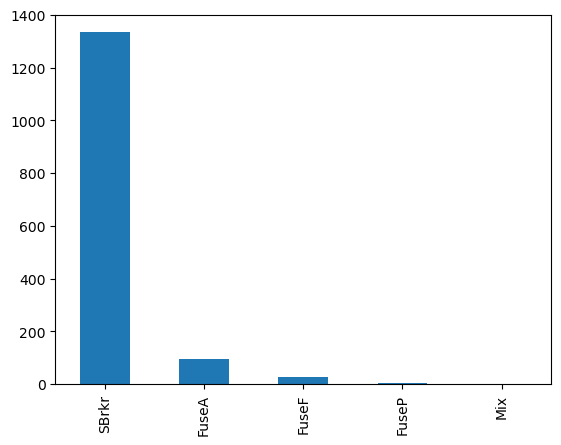

In [11]:
df1['Electrical'].value_counts().plot.bar()

In [12]:
# fill with most frequent element
df1['Electrical'].fillna(df1['Electrical'].mode()[0], inplace=True)

In [13]:
df1['BsmtQual'].mode()[0]

'TA'

<Axes: >

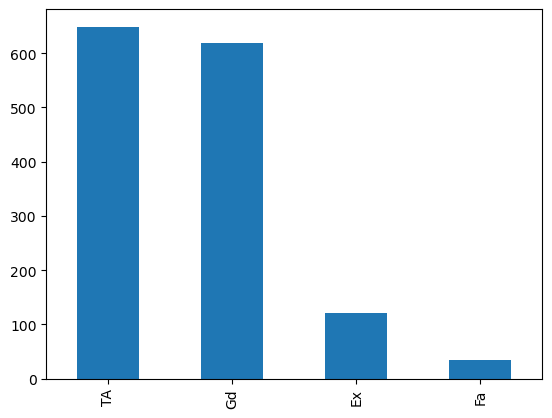

In [14]:
df1['BsmtQual'].value_counts().plot.bar()

In [15]:
# Since house is almost equally likely to have one type for basements of TA
# and Gd, we fill empty rows randomly either TA or Gd
import random
random.uniform(0, 1)
def getBSMNTtype(self) :
    x = random.uniform(0, 1)
    if x > 0.5 :
        return 'TA'
    else: 
        return 'Gd'
    
df1['BsmtQual'].fillna(df1['BsmtQual'].apply(getBSMNTtype), inplace=True) 

In [16]:
df1['MasVnrType'].isnull().sum()


8

In [17]:
df1['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0], inplace=True)

In [19]:
df1['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
16.0       7
200.0      6
340.0      6
106.0      6
80.0       6
132.0      5
320.0      5
360.0      5
84.0       5
170.0      5
220.0      4
336.0      4
183.0      4
252.0      4
196.0      4
300.0      4
268.0      4
40.0       4
168.0      4
100.0      4
270.0      4
210.0      4
76.0       4
288.0      4
216.0      4
        ... 
466.0      1
109.0      1
479.0      1
219.0      1
175.0      1
594.0      1
296.0      1
146.0      1
616.0      1
870.0      1
530.0      1
500.0      1
510.0      1
247.0      1
255.0      1
432.0      1
126.0      1
473.0      1
376.0      1
161.0      1
224.0      1
248.0      1
772.0      1
435.0      1
378.0      1
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [20]:
df1['MasVnrArea'].fillna(0, inplace=True)

<Axes: >

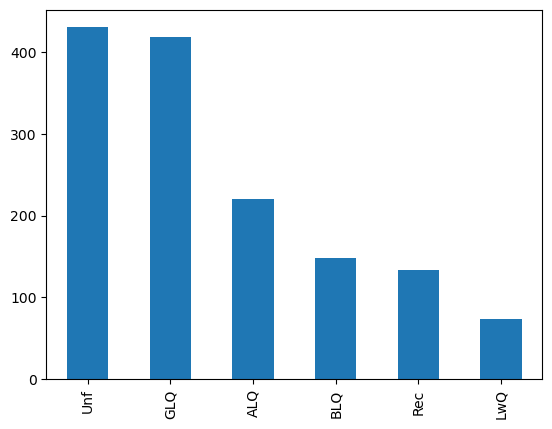

In [21]:
df1['BsmtFinType1'].value_counts().plot.bar()


In [22]:
# Since house is almost equally likely to have one type for basements of TA
# and Gd, we fill empty rows randomly either TA or Gd
import random
random.uniform(0, 1)
def getType(self) :
    x = random.uniform(0, 1)
    if x > 0.5 :
        return 'Unf'
    else: 
        return 'GLO'
    
df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].apply(getBSMNTtype), inplace=True)     
    

<Axes: >

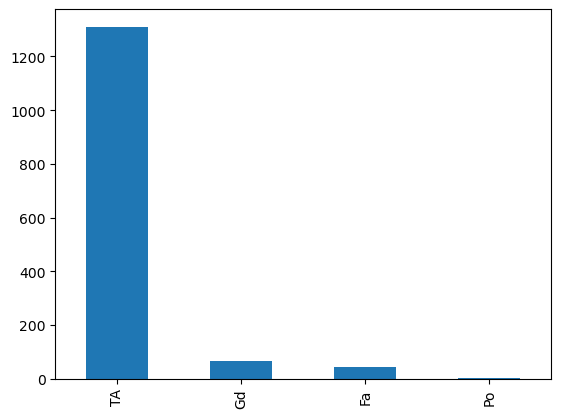

In [23]:
df1['BsmtCond'].value_counts().plot.bar()

In [24]:
df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0], inplace=True)

<Axes: >

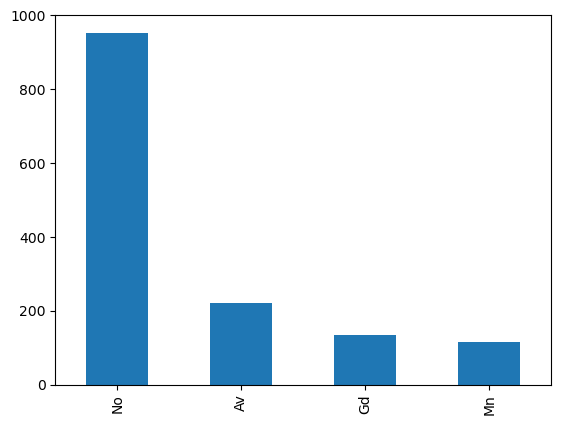

In [25]:
df1['BsmtExposure'].value_counts().plot.bar()

In [26]:
df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0], inplace=True)

<Axes: >

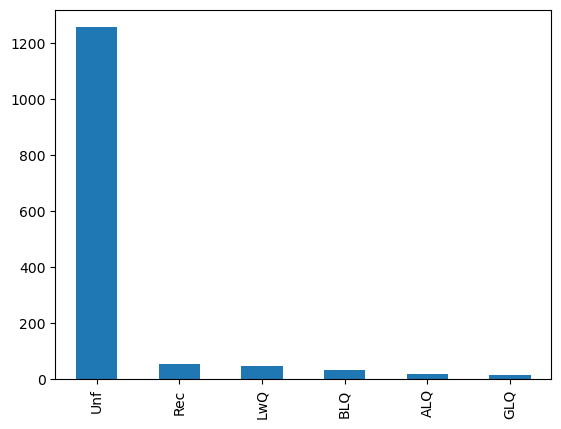

In [27]:
df1['BsmtFinType2'].value_counts().plot.bar()

In [28]:
df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0], inplace=True)

<Axes: >

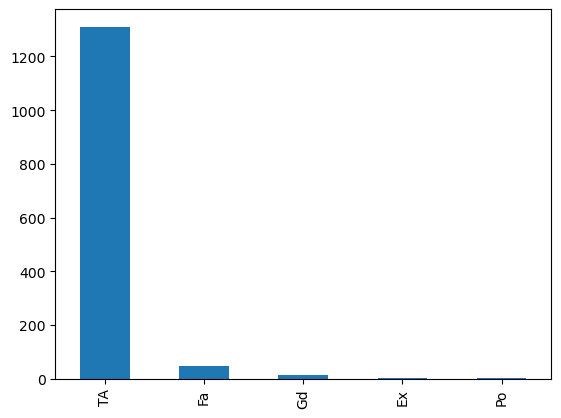

In [29]:
#GarageQual
df1['GarageQual'].value_counts().plot.bar()

In [30]:
df1['GarageQual'].fillna(df1['GarageQual'].mode()[0], inplace = True)

<Axes: >

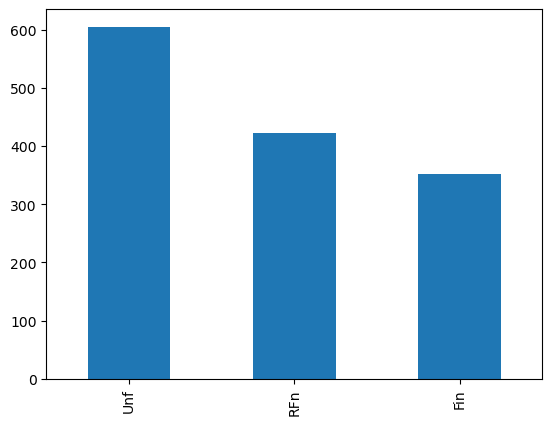

In [31]:
#GarageFinish       
df1['GarageFinish'].value_counts().plot.bar()

In [32]:
# my understanding is that 
# Unf: unfinished
# RFn: renovated finished?
# Fin: finished

df1['GarageFinish'].value_counts(normalize=True)

Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: GarageFinish, dtype: float64

In [33]:
df1['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [34]:


# Since house is almost equally likely to have one type for garage types 
# and Gd, we fill empty rows randomly either Rfn/Unf/Fin
import random
random.uniform(0, 1)

def getType(self) :
    x = random.uniform(0, 1)
    if x < 0.44 :
        return 'RFn'
    elif  0.44 <=x and x < 76 :
        return 'Unf' 
    else :
        return  'Fin'
    
df1['GarageFinish'].fillna(df1['GarageFinish'].apply(getType), inplace = True)



In [35]:
df2['GarageFinish'].value_counts(normalize=True)

Unf    0.452571
RFn    0.281680
Fin    0.265749
Name: GarageFinish, dtype: float64

In [36]:
import random
random.uniform(0, 1)

def getType(self) :
    x = random.uniform(0, 1)
    if x < 0.45 :
        return 'Unf'
    elif  0.45 <=x and x < 74 :
        return 'RFn' 
    else :
        return  'Fin'
df2['GarageFinish'].fillna(df2['GarageFinish'].apply(getType), inplace = True)    

In [37]:
## my understanding is that 
# Unf: unfinished
# RFn: renovated finished?
# Fin: finished
# So I accept renovated garage as finished as well. 
df1['GarageFinish'] = np.where( (df1['GarageFinish'] == 'RFn') | (df1['GarageFinish']=='Fin'), 1, \
                            np.where((df1['GarageFinish'] == 'Unf') , 0, df1['GarageFinish']) )


df2['GarageFinish'] = np.where( (df2['GarageFinish'] == 'RFn') | (df2['GarageFinish']=='Fin'), 1, \
                            np.where((df2['GarageFinish'] == 'Unf') , 0, df2['GarageFinish']) )


In [38]:
df1.columns
col_list = [];
for col in df1.columns :
    if df1[col].isnull().sum() == 0 :
        col_list.append(col)
        #print(col)
col_list.remove('Id')
col_list.remove('SalePrice') 
col_list.remove('YearBuilt')
col_list.remove('YearRemodAdd')
col_list.remove('SaleType')
col_list.remove('YrSold')
col_list.remove('MoSold')
print(col_list)

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleCondition']


In [39]:
df1['Age'] = 2023 - df1['YearBuilt']
df1['RemodAge'] = 2023 - df1['YearRemodAdd']
df1['SoldAge'] = 2023 - df1['YrSold']


In [40]:
# GarageYrBlt TAHMINI

y = df1['SalePrice']

predict_column = 'GarageYrBlt'

features = ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 
            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 
            'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
            'PoolArea', 'MiscVal', 'SaleCondition', 'Age', 'RemodAge', 'SoldAge']

test_indices = df1[df1[predict_column].isnull()].index
train_df = df1.drop(test_indices)

x = df1[features]
x= pd.get_dummies(x,drop_first=True)
print(x.shape)


x_test = x.loc[test_indices]
print(x_test.shape)
x.drop(test_indices, axis=0, inplace = True)
x_train = x
print(x_train.shape)

y_train = train_df[predict_column].astype(int)

#test_df = df1.loc[test_indices]
#train_df = df1.drop(test_indices)

#x_train = train_df[features]
#x_train = pd.get_dummies(x_train,drop_first=True)
#y_train = train_df[predict_column].astype(int)
#x_test = test_df[features]
#x_test = pd.get_dummies(x_test,drop_first = True)

(1460, 213)
(81, 213)
(1379, 213)


C:\Users\haluk\AppData\Local\Temp\ipykernel_20188\2441489412.py:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x= pd.get_dummies(x,drop_first=True)


In [41]:
x_train.shape,x_test.shape,y_train.shape

((1379, 213), (81, 213), (1379,))

In [42]:
x_train.shape,x_test.shape,y_train.shape

((1379, 213), (81, 213), (1379,))

In [43]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [44]:
y_pred_xgb = model.predict(x_test)

In [45]:
df1.loc[df1['GarageYrBlt'].isnull(), 'GarageYrBlt'] =  y_pred_xgb

In [46]:
df1['GarageYrBlt'] = df1['GarageYrBlt'].astype(int)


In [47]:
df2['GarageYrBlt'].fillna(df2['GarageYrBlt'].mean(), inplace = True )
df2['GarageYrBlt'].astype(int)

0       1961
1       1958
2       1997
3       1998
4       1992
5       1993
6       1992
7       1998
8       1990
9       1970
10      1999
11      1971
12      1997
13      1975
14      1975
15      2009
16      2009
17      2005
18      2005
19      2003
20      2002
21      2006
22      2005
23      2006
24      2004
25      2004
26      1998
27      2005
28      2009
29      2005
        ... 
1429    1925
1430    1957
1431    1977
1432    1977
1433    1977
1434    2005
1435    2004
1436    1979
1437    1978
1438    2001
1439    1975
1440    1958
1441    2000
1442    2005
1443    2005
1444    1951
1445    1997
1446    1977
1447    1968
1448    1970
1449    1977
1450    1972
1451    1969
1452    1970
1453    1977
1454    1977
1455    1970
1456    1960
1457    1977
1458    1993
Name: GarageYrBlt, Length: 1459, dtype: int32

In [48]:
df1['GarageAge'] = 2023 - df1['GarageYrBlt']
df2['GarageAge'] = 2023 - df2['GarageYrBlt']


df2['Age'] = 2023 - df2['YearBuilt']
df2['RemodAge'] = 2023 - df2['YearRemodAdd']
df2['SoldAge'] = 2023 - df2['YrSold']

df1 = df1.drop('YearBuilt', axis=1)
df1 = df1.drop('YearRemodAdd', axis=1)
df1 = df1.drop('YrSold', axis=1)
df1 = df1.drop('GarageYrBlt', axis=1)


df2 = df2.drop('YearBuilt', axis=1)
df2 = df2.drop('YearRemodAdd', axis=1)
df2 = df2.drop('YrSold', axis=1)
df2 = df2.drop('GarageYrBlt', axis=1)

<Axes: >

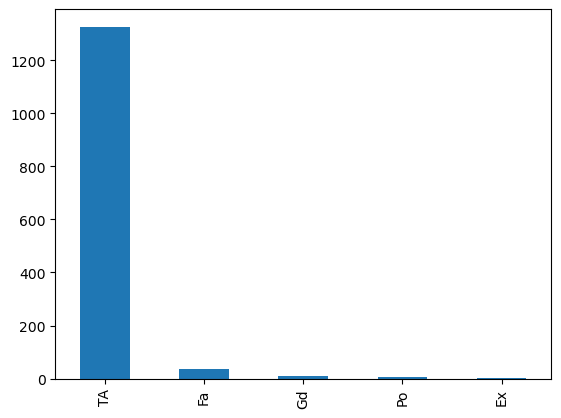

In [49]:
df1['GarageCond'].value_counts().plot.bar()

In [50]:
df1['GarageCond'].fillna(df1['GarageCond'].mode()[0],inplace = True )

In [51]:
df1['GarageCond'].isnull().sum()

0

<Axes: >

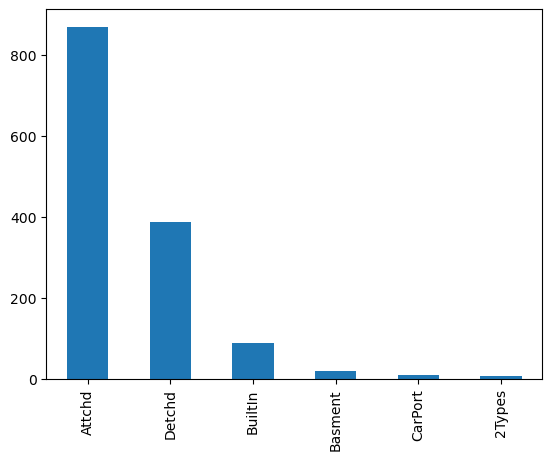

In [52]:
df1['GarageType'].value_counts().plot.bar()

In [53]:
df1['GarageType'].fillna( df1['GarageType'].mode()[0], inplace = True )

In [54]:
df1['GarageType'].isnull().sum()

0

In [55]:
#'LotFrontage' ESTIMATION

y = df1['SalePrice']

predict_column = 'LotFrontage'

features = ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
            'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
            'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 
            'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
            'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
            'Functional', 'Fireplaces', 'GarageType', 'GarageAge', 'GarageFinish', 'GarageCars', 'GarageArea', 
            'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
            'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleCondition', 'Age', 'RemodAge', 'SoldAge']

test_indices = df1[df1[predict_column].isnull()].index
train_df = df1.drop(test_indices)

x = df1[features]
x= pd.get_dummies(x,drop_first=True)
print(x.shape)


x_test = x.loc[test_indices]
print(x_test.shape)
x.drop(test_indices, axis=0, inplace = True)
x_train = x
print(x_train.shape)

y_train = train_df[predict_column].astype(int)

(1460, 223)
(259, 223)
(1201, 223)


C:\Users\haluk\AppData\Local\Temp\ipykernel_20188\3364844577.py:22: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x= pd.get_dummies(x,drop_first=True)


In [56]:
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [57]:
y_pred_xgb = model.predict(x_test)

In [58]:
df1.loc[df1['LotFrontage'].isnull(), 'LotFrontage'] =  y_pred_xgb

In [59]:
df2['LotFrontage'].fillna(df2['LotFrontage'].mean(),inplace=True)

In [60]:
# i ASSUME THAT almost half 669 have no fire place

<Axes: >

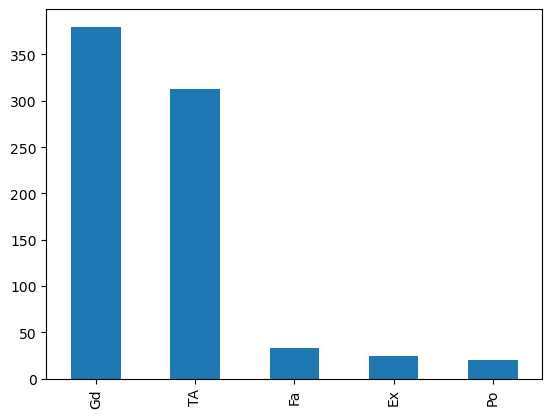

In [61]:
df1['FireplaceQu'].value_counts().plot.bar()

In [62]:
df1['FireplaceQu'].isnull().sum()

690

In [63]:
df1['FireplaceQu'].fillna('None',inplace=True)
df2['FireplaceQu'].fillna('None',inplace=True)

<Axes: >

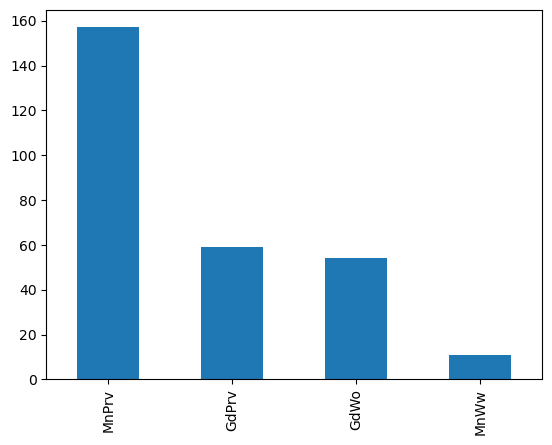

In [64]:
df1['Fence'].value_counts().plot.bar()

In [65]:
df1['Fence'].fillna('None',inplace=True)
df2['Fence'].fillna('None',inplace=True)

<Axes: >

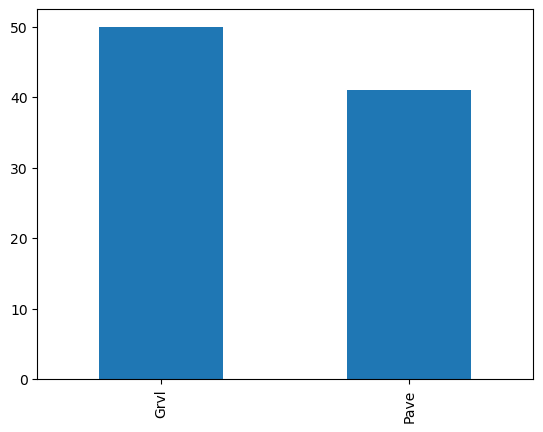

In [66]:
df1['Alley'].value_counts().plot.bar()

In [67]:
df1['Alley'].fillna('None',inplace=True)
df2['Alley'].fillna('None',inplace=True)

In [68]:
df1['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

<Axes: >

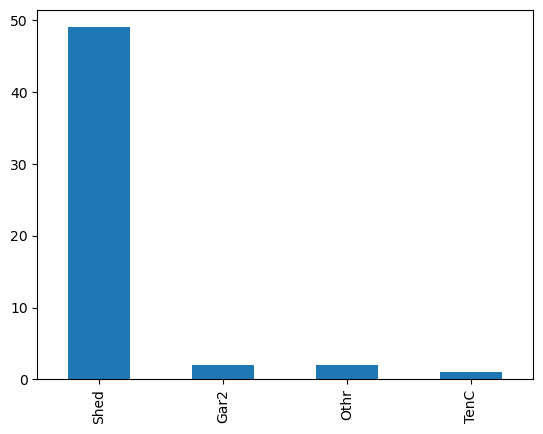

In [69]:
df1['MiscFeature'].value_counts().plot.bar()

In [70]:
df1 = df1.drop('MiscFeature', axis=1)
df2 = df2.drop('MiscFeature', axis=1)

In [71]:
df1['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [72]:
df1['pool'] = np.where( df1['PoolQC'].notnull(), 1, df1['PoolQC'] )
df1['pool'] = np.where( df1['PoolQC'].isnull() , 0, df1['PoolQC'] )

df2['pool'] = np.where( df2['PoolQC'].notnull(), 1, df2['PoolQC'] )
df2['pool'] = np.where( df2['PoolQC'].isnull() , 0, df2['PoolQC'] )


df1 = df1.drop('PoolQC', axis=1)
df2 = df2.drop('PoolQC', axis=1)


In [73]:
df2['GarageArea'].fillna(df2['GarageArea'].mean(), inplace=True) 

In [74]:
df2['GarageCars'].fillna( 0, inplace = True )

In [75]:
df2['BsmtFinSF2'].fillna(df2['BsmtFinSF2'].mean(), inplace=True) 

In [76]:
df2['BsmtUnfSF'].fillna(df2['BsmtUnfSF'].mean(), inplace=True) 

In [77]:
df1 = df1.drop('SaleType', axis=1)
df2 = df2.drop('SaleType', axis=1)

In [78]:
df2['BsmtFinSF1'].fillna(df2['BsmtFinSF1'].mean(), inplace=True)

In [79]:
df2['TotalBsmtSF'].fillna(df2['TotalBsmtSF'].mean(), inplace = True )

In [80]:
pd.options.display.min_rows = 115
df2.isnull().sum().sort_values(ascending=True)

Id                0
Fireplaces        0
TotRmsAbvGrd      0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
FireplaceQu       0
GrLivArea         0
2ndFlrSF          0
1stFlrSF          0
Electrical        0
CentralAir        0
SoldAge           0
Heating           0
LowQualFinSF      0
TotalBsmtSF       0
GarageFinish      0
GarageArea        0
RemodAge          0
Age               0
GarageAge         0
SaleCondition     0
MoSold            0
MiscVal           0
GarageCars        0
Fence             0
ScreenPorch       0
3SsnPorch         0
EnclosedPorch     0
                 ..
OverallCond       0
RoofStyle         0
LandContour       0
RoofMatl          0
ExterCond         0
BsmtFinSF1        0
MSSubClass        0
LotFrontage       0
LotArea           0
Foundation        0
ExterQual         0
LotShape          0
KitchenQual       1
Exterior2nd       1
Exterior1st       1
BsmtHalfBath      2
Functional        2
Utilities         2
BsmtFullBath      2


In [81]:
df2['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', nan], dtype=object)

In [82]:
df2['KitchenQual'].fillna(df2['KitchenQual'].mode()[0], inplace = True)

In [83]:
df2['Exterior1st'].unique()
df2['Exterior1st'].fillna(df2['Exterior1st'].mode()[0], inplace = True)

In [84]:
df2['Exterior2nd'].fillna(df2['Exterior2nd'].mode()[0], inplace = True)

In [85]:
df2['Functional'].fillna(df2['Functional'].mode()[0], inplace = True)

In [86]:
df2['BsmtFullBath'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [87]:
df2['BsmtFullBath'].fillna(df2['BsmtFullBath'].mean(), inplace = True )

In [88]:
df2['Utilities'].fillna(df2['Utilities'].mode()[0], inplace = True )

In [89]:
df2['BsmtHalfBath'].fillna(df2['BsmtHalfBath'].mode()[0], inplace = True)

In [90]:
df2['MSZoning'].fillna(df2['MSZoning'].mode()[0], inplace = True)

In [91]:
df2['MasVnrArea'].fillna(df2['MasVnrArea'].mean(), inplace = True)

In [92]:
df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0], inplace = True)

<Axes: >

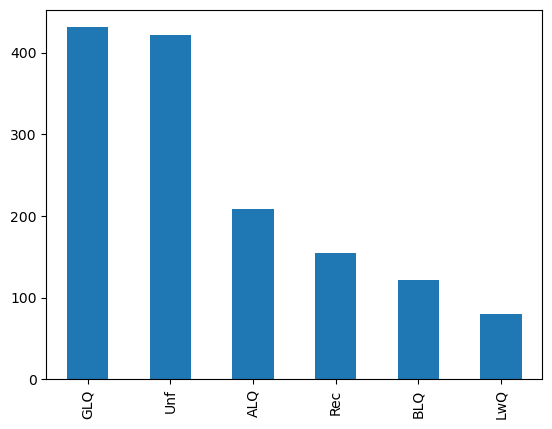

In [93]:
df2['BsmtFinType1'].value_counts().plot.bar()

In [94]:
df2['BsmtFinType1'].unique()

array(['Rec', 'ALQ', 'GLQ', 'Unf', 'BLQ', 'LwQ', nan], dtype=object)

In [95]:
import random
random.uniform(0, 1)

def getType(self) :
    x = random.uniform(0, 1)
    if x < 0.5 :
        return 'GLQ'
    else : 
        return 'Unf'
df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].apply(getType), inplace = True)  

<Axes: >

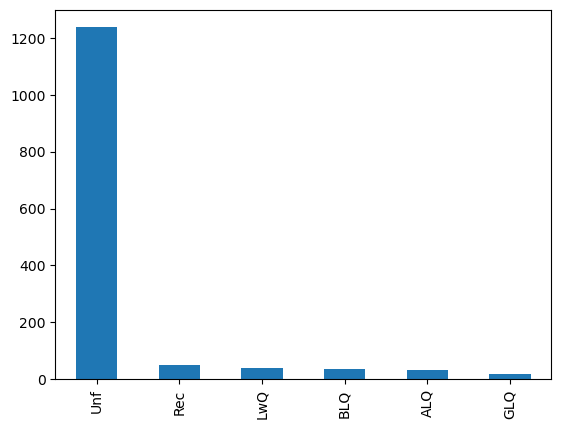

In [96]:
df2['BsmtFinType2'].value_counts().plot.bar()

In [97]:
df2['BsmtFinType2'].fillna(df2['BsmtFinType2'].mode()[0], inplace = True) 

<Axes: >

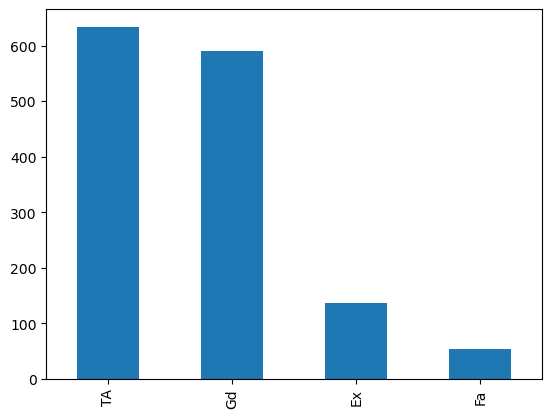

In [98]:
df2['BsmtQual'].value_counts().plot.bar()

In [99]:
import random
random.uniform(0, 1)

def getType(self) :
    x = random.uniform(0, 1)
    if x < 0.5 :
        return 'TA'
    else : 
        return 'Gd'
df2['BsmtQual'].fillna(df2['BsmtQual'].apply(getType), inplace = True)  



In [100]:
df2['BsmtQual'].isnull().sum()

0

<Axes: >

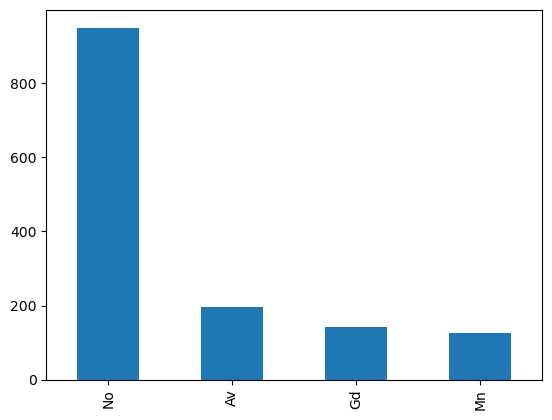

In [101]:
df2['BsmtExposure'].value_counts().plot.bar()

In [102]:
df2['BsmtExposure'].fillna(df2['BsmtExposure'].mode()[0], inplace = True)  

<Axes: >

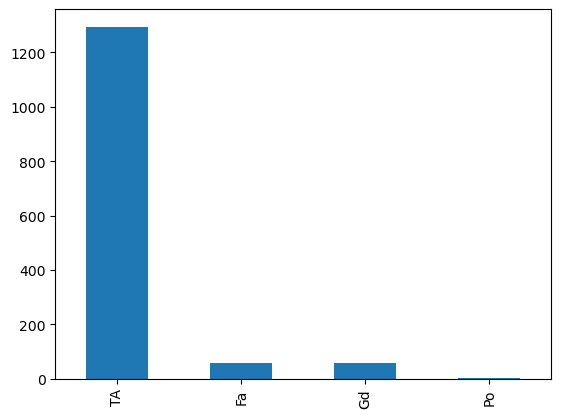

In [103]:
df2['BsmtCond'].value_counts().plot.bar()

In [104]:
df2['BsmtCond'].fillna(df2['BsmtCond'].mode()[0], inplace = True)

<Axes: >

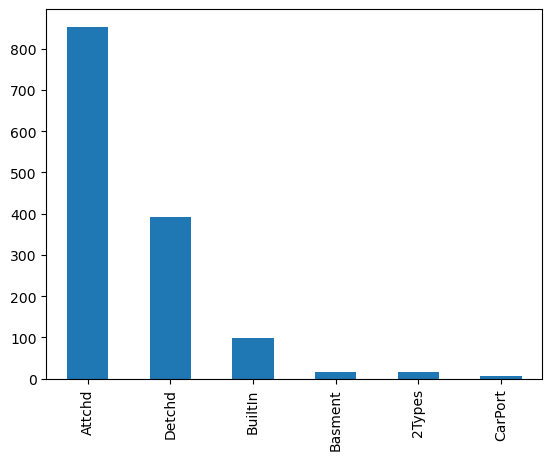

In [105]:
df2['GarageType'].value_counts().plot.bar()

In [106]:
df2['GarageType'].value_counts(normalize  = True)

Attchd     0.616775
Detchd     0.283442
BuiltIn    0.070860
Basment    0.012292
2Types     0.012292
CarPort    0.004338
Name: GarageType, dtype: float64

In [107]:
import random
random.uniform(0, 1)

def getType(self) :
    x = random.uniform(0, 1)
    if x < 0.7 :
        return 'Attchd'
    else : 
        return 'Detchd'
df2['GarageType'].fillna(df2['GarageType'].apply(getType), inplace = True)  

In [108]:
df2['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', '2Types', 'CarPort'],
      dtype=object)

<Axes: >

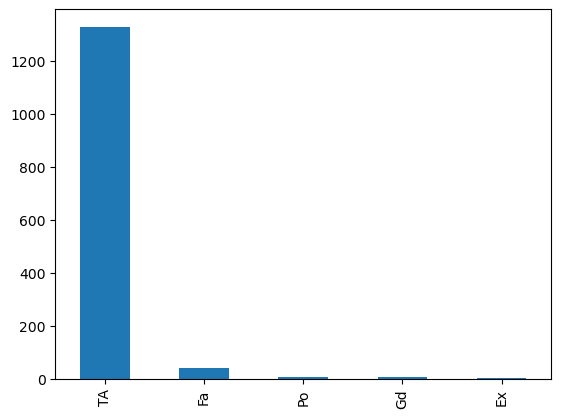

In [109]:
df2['GarageCond'].value_counts().plot.bar()

In [110]:
df2['GarageCond'].fillna(df2['GarageCond'].mode()[0], inplace = True)

In [111]:
df2['GarageQual'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Po'], dtype=object)

<Axes: >

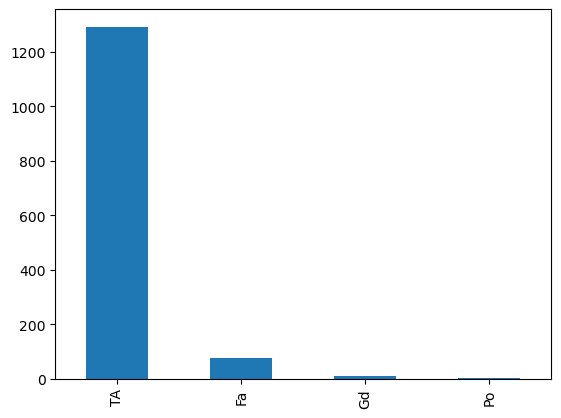

In [112]:
df2['GarageQual'].value_counts().plot.bar()

In [113]:
df2['GarageQual'].fillna(df2['GarageQual'].mode()[0], inplace = True)

## ESTIMATION

In [114]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [115]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [116]:
y = df1['SalePrice']
x = df1[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 'SaleCondition', 'Age', 'RemodAge',
       'SoldAge', 'GarageAge', 'pool']]
x= pd.get_dummies(x,drop_first=True)


C:\Users\haluk\AppData\Local\Temp\ipykernel_20188\1940448649.py:18: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x= pd.get_dummies(x,drop_first=True)


In [117]:
fnc_all_regression_models(x,y)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.904e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.890853,28934.324389,17332.206153
Ridge,0.876163,30819.928953,19879.939450
ElasticNet,0.835295,35543.526767,20843.591084
Lasso,0.780256,41054.899662,20027.212297
ExtraTreeRegressor,0.774197,41617.113039,27164.000000
LinearRegression,0.765129,42444.542273,20290.465666
KNeighborsRegressor,0.704462,47611.667852,28120.070548


## PREDICTING KAGGLE TEST DATA SET

In [118]:
y_train = df1['SalePrice']
x_train = df1[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 'SaleCondition', 'Age', 'RemodAge',
       'SoldAge', 'GarageAge', 'pool']]


x_test = df2[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 'SaleCondition', 'Age', 'RemodAge',
       'SoldAge', 'GarageAge', 'pool']]




In [119]:
x_final = pd.concat([x_train, x_test])

In [120]:
x_finall = pd.get_dummies(x_final,drop_first=True)

C:\Users\haluk\AppData\Local\Temp\ipykernel_20188\4056067028.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x_finall = pd.get_dummies(x_final,drop_first=True)


In [121]:
x_train_f = x_finall.iloc[0:1460, :]

In [122]:
x_test_f = x_finall.iloc[1460:,: ]

In [123]:
from sklearn.ensemble import GradientBoostingRegressor

In [124]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [126]:
x_test_f[['GarageQual_Fa','RoofMatl_CompShg',        
'RoofMatl_Membran',        
'Exterior1st_ImStucc',     
'BsmtFinType1_TA',         
'RoofMatl_Roll',           
'Utilities_NoSeWa',        
'Heating_GasA',            
'HouseStyle_2.5Fin',       
'Heating_OthW',            
'Condition2_RRNn',         
'Condition2_RRAn',         
'Condition2_RRAe',         
'Exterior2nd_Other',       
'Electrical_Mix',          
'BsmtFinType1_Gd',         
'Exterior1st_Stone',       
'RoofMatl_Metal' ] ].fillna(0, inplace= True)
x_test_f['pool_Fa'].fillna(0, inplace= True)

C:\Users\haluk\AppData\Local\Temp\ipykernel_20188\701628505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_f[['GarageQual_Fa','RoofMatl_CompShg',
C:\Users\haluk\AppData\Local\Temp\ipykernel_20188\701628505.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_f['pool_Fa'].fillna(0, inplace= True)


In [127]:
pd.options.display.min_rows = 115
x_test_f.isnull().sum().sort_values(ascending=True)

MSSubClass              0
ExterQual_Gd            0
ExterQual_TA            0
ExterCond_Fa            0
ExterCond_Gd            0
ExterCond_Po            0
ExterCond_TA            0
Foundation_CBlock       0
Foundation_PConc        0
Foundation_Slab         0
Foundation_Stone        0
Foundation_Wood         0
BsmtQual_Fa             0
ExterQual_Fa            0
BsmtQual_Gd             0
BsmtCond_Gd             0
BsmtCond_Po             0
BsmtCond_TA             0
BsmtExposure_Gd         0
BsmtExposure_Mn         0
BsmtExposure_No         0
BsmtFinType1_BLQ        0
BsmtFinType1_GLQ        0
BsmtFinType1_Gd         0
BsmtFinType1_LwQ        0
BsmtFinType1_Rec        0
BsmtFinType1_TA         0
BsmtQual_TA             0
BsmtFinType1_Unf        0
MasVnrType_Stone        0
                       ..
Condition2_Norm         0
Condition1_RRNn         0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood

In [142]:
len(x_test)

1459

In [130]:
GBC= GradientBoostingRegressor()
model=GBC.fit(x_train_f,y_train)
Kaggle_pred=model.predict(x_test_f)

In [129]:
Kaggle_pred

array([118326.44221083, 163987.22353803, 181205.49894644, ...,
       167305.14045488, 123388.39993137, 241813.34540661])

In [138]:
df_predict = pd.DataFrame(Kaggle_pred, columns = ['SalePrice'])
df_predict['Id'] = df2['Id']

In [139]:
df_predict.to_csv("myHouse_predict.csv",index=False)

In [135]:
#ERROR: Unexpected Column:  'predict' (Line 1, Column 1)
#ERROR: Required column 'Id' could not be found
#ERROR: Required column 'SalePrice' could not be found

In [167]:
def func_predict_y(x_train,x_test, y_train):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    from xgboost import XGBRegressor
    
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    XGBC = XGBRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN, XGBC]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor',
                'GradientBoostingRegressor','KNeighborsRegressor', 'XGBRRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
 
    w = len(x_test)
    h = 8
    pred_y = [[0 for x in range(w)] for y in range(h)] 
    algo_i = 0;
    for item in algos:
        item.fit(x_train,y_train)
        #pred_y[algo_i,:] = item.predict(x_test)
        arr_ = item.predict(x_test)
        pred_y[algo_i] = arr_ 
        print(len(arr_))
        #print(item.predict(x_test))
        algo_i = algo_i + 1;
        #r_squared.append(r2_score(y_test,item.predict(x_test)))
        #rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        #mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    #result.R_Squared=r_squared
    #result.RMSE=rmse
    #result.MAE=mae
    #return result.sort_values('R_Squared',ascending=False)
    return pred_y

In [168]:
myPredict = func_predict_y(x_train_f,x_test_f, y_train)

1459
1459


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.187e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


1459


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.798e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


1459
1459
1459
1459
1459


In [164]:
myPredict[1][:]

array([101183.54531839, 139622.42584831, 174551.05333584, ...,
       161210.25577424,  99854.34573075, 221672.38289589])

In [173]:
df_predict = pd.DataFrame(myPredict[7][:], columns = ['SalePrice'])
df_predict['Id'] = df2['Id']

In [174]:
df_predict.to_csv("myHouse_predict.csv",index=False)

In [175]:
myPredict[7]

array([123106.79, 148759.84, 177499.94, ..., 163176.27, 108466.38,
       211040.66], dtype=float32)